<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa - Portugal*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa em Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2022-09-13/visualisations/listings.csv')

## Análise dos Dados


Abaixo segue a definição de cada uma das 18 variáveis desse conjunto de dados

&nbsp;

| **Variáveis** | **Definição** |
|---|---|
|* **id**|Numeração única de identificação de cada imóvel|
|* **name**|Nome do imóvel que foi anunciado|
|* **host_id**|Numeração única de identificação do proprietário (anfitrião) de cada imóvel|
|* **host_name**|Nome do proprietário (anfitrião)|
|* **neighbourhood_group**|Numeração única de identificação de cada imóvel|
|* **neighbourhood**|Nome do bairro|
|* **latitude**|Coordenada Latitude|
|* **longitude**|Coordenada Longitude|
|* **room_type**|Tipo de quarto anunciado|
|* **price**|Preço de aluguel|
|* **minimum_nights**|Quantidade mínima de noites para efetuar a reserva|
|* **number_of_reviews**|Número de comentários que o imóvel possui|
|* **last_review**|Data do último comentário do imóvel|
|* **reviews_per_month**|Quantidade de comentários mensais do imóvel|
|* **calculated_host_listings_count**|Quantidade de imóveis do mesmo proprietário (anfitrião)|
|* **availability_365**|Numeros de dias disponíveis para os próximos 365 dias|
|* **number_of_reviews_ltm**|Quantidade de comentários do imóvel nos últimos 12 meses|
|* **licence**|Número de licença/autorização/registro do imóvel|

&nbsp;

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,69,3,44,2022-08-09,0.45,1,195,15,NaN
1,36664873,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,95,2,21,2022-09-03,0.56,1,72,8,42622/AL
2,25345952,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,65,5,37,2022-08-18,0.89,2,269,16,Exempt
3,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,54,2,166,2022-09-11,1.62,1,304,45,56539/AL.
4,28283003,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,59,3,12,2022-08-29,0.27,3,170,5,84329/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Em seguida, vamos identificar qual o tamanho do nosso dataset, observando o número de variáveis, número de entradas e até os tipos de variáveis. 

Além disso, vale mencionar que o conjunto de dados sendo utilizado é uma versão "resumida" do Airbnb. Na mesma página em que baixamos o arquivo `listings.csv`, estão disponíveis conjuntos mais completos, como o `listings.csv.gz`. 

Apesar disso, o dataset utilizado supre completamente a análise exploratória realizada aqui.

In [4]:
# identificar o volume de dados do DataFrame
print(f"Quantidade de Entradas: {df.shape[0]}")
print(f"Quantidade de Atributos: {df.shape[1]}\n")

# verificar os tipos de atributos
df.dtypes

Quantidade de Entradas: 19651
Quantidade de Atributos: 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É **importantíssimo** tratar os valores ausentes em nosso dataset, estando eles diretamente relacionados com a qualidade de nosso conjunto de dados. 

Vamos tentar entender logo de cara qual é a relevância percentual desses valores ausentes se comparados ao total de entradas.

Com isso, foi possível notar que:

* As variáveis `reviews_per_month` e `last_review` possuem praticamente 10% de entradas ausentes.
* A coluna `licence` possui praticamente 7% de entradas ausentes.
* A coluna `name` possui cerca de 0.05% de entradas ausentes.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
round((df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100 ), 3)

reviews_per_month                 9.842
last_review                       9.842
license                           6.931
name                              0.041
number_of_reviews_ltm             0.000
availability_365                  0.000
calculated_host_listings_count    0.000
number_of_reviews                 0.000
minimum_nights                    0.000
id                                0.000
room_type                         0.000
longitude                         0.000
latitude                          0.000
neighbourhood                     0.000
neighbourhood_group               0.000
host_name                         0.000
host_id                           0.000
price                             0.000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Uma ferramenta gráfica que ilustra bem a distribuição de um conjunto de dados é o histograma. Vamos plotar essas distribuições para cada uma de nossa variáveis numéricas.

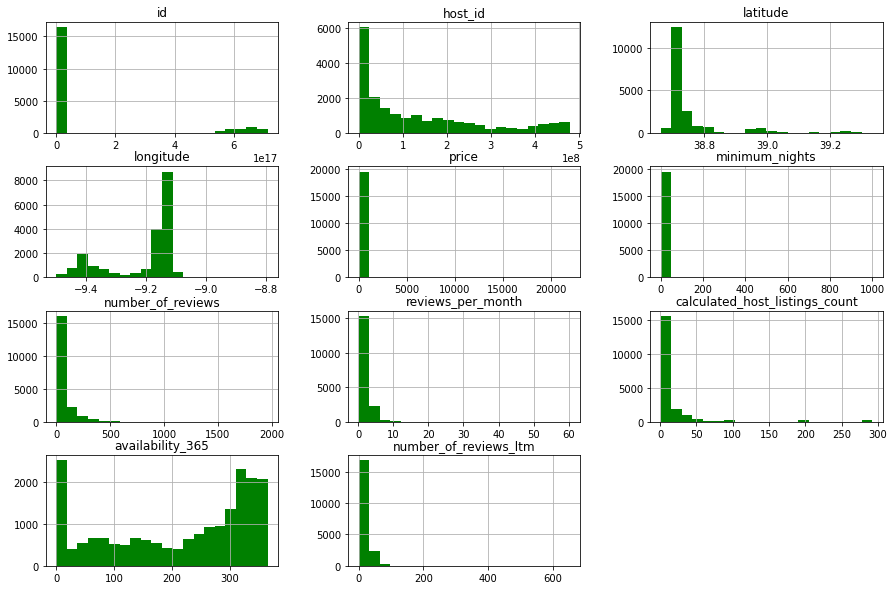

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(15,10), color='g');

#### Existem ouliers presentes?

A partir dos histogramas acima, podemos notar ocorrências de valores muito discrepantes em nossa distribuição, podendo assim indicar que estamos lidando com outliers. Existem formas rápidas para detectar esses dados. Como por exemplo:

* Resumo estatístico pelo método describe().
* Plotar boxplots para as variáveis investigadas.

#### Utilizando o método describe()

In [7]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19651.000000,19651.000000,19651.000000,17717.000000,19651.000000,19651.000000
mean,142.822197,3.979899,54.666124,1.507802,16.245229,211.683070
std,298.507221,15.534765,82.187743,1.515960,41.784592,124.981629
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,5.000000,0.430000,1.000000,96.000000
50%,100.000000,2.000000,21.000000,1.070000,4.000000,255.000000
75%,152.000000,3.000000,69.000000,2.170000,13.000000,323.000000
max,22000.000000,1000.000000,1961.000000,60.390000,292.000000,365.000000


A partir do resumo estatístico acima, podemos confirmar a nossa suspeita sobre a presença de outliers, como por exemplo:

* A variável `price` possui um valor nulo para o aluguel, o que não faz sentido do ponto de vista de negócio. Além disso, o valor máximo está muito elevado em relação à mediana, o que pode ser um indicativo que estamos lidando com um outlier que, se não tratado, poderá enviesar drasticamente nossa análise.
* A variável `minimum_nights` possui valor superior aos 365 dias do ano.

##### **Mas...como reconhecer objetivamente um outlier?**

É de grande importância identificar/classificar e limpar esses pontos discrepantes, visto que eles podem mostrar conclusões equivocadas e enviesadas sobre o nosso conjunto de dados. Por isso, apesar da visualização estatística dos dados com o método `describe()` e da visualização gráfica das variáveis com os histogramas serem úteis, se fazem necessárias estratégias com maior embasamento técnico e com maior objetividade, como por exemplo:

- IQR Score
- Boxplots
- Scatter Plots
- Z-Score

Utilizaremos aqui as duas primeiras técnicas para tratar nossos outliers.

### Utilizando o IQR Score

Vamos lembrar o que é o IQR. Basicamente, IQR (do inglês, Interquartile Range) corresponde à distância entre o Terceiro Quartil (75%) e Primeiro Quartil (25%). Portanto, IQR = Q3 - Q1.

Além disso, os limiares seguem as expressões a seguir:

* "Limiar Máximo" = Q3 + 1.5 * IQR
* "Limiar Mínimo" = Q1 - 1.5 * IQR

Logo, seguiremos a seguinte sequência de etapas:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

### Identificando ouliers para variável `price`

In [8]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  83.0
Limite superior de price:  276.5
Limite inferior de price:  -55.5


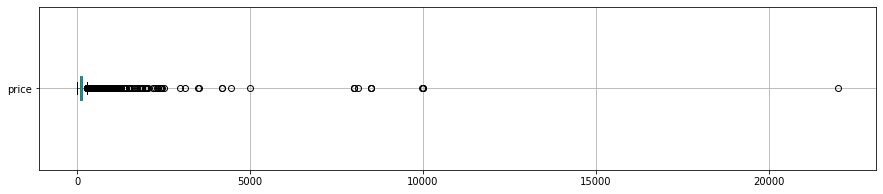

In [9]:
df.boxplot(column='price', vert=False, figsize=(15,3));

In [10]:
# constatando relevância percentual dos valores acima de nosso limiar superior
num_out = df[df.price > sup_price].shape[0]
print(f"Temos {num_out} entradas com valores acima de {sup_price}.")
print(f"Percentualmente, valendo {(num_out/df.shape[0])*100}%")

Temos 1442 entradas com valores acima de 276.5.
Percentualmente, valendo 7.338048954251692%


### Identificando ouliers para variável `minimum_nights`

In [11]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


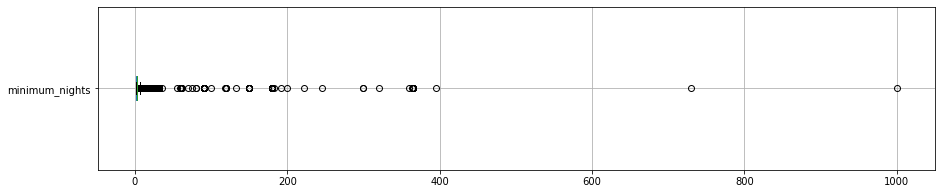

In [12]:
df.boxplot(column='minimum_nights',vert=False, figsize=(15,3));

In [13]:
# constatando relevância percentual dos valores acima de nosso limiar superior
num_out = df[df.minimum_nights > sup_minimum_nights].shape[0]
print(f"Temos {num_out} entradas com valores acima de {sup_minimum_nights}.")
print(f"Percentualmente, valendo {(num_out/df.shape[0])*100}%")

Temos 1334 entradas com valores acima de 6.0.
Percentualmente, valendo 6.788458602615643%


### Histogramas sem outliers

Já que identificamos outliers nas variáveis `price` e `minimum_nights`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

In [14]:
# remover outliers do nosso DataFrame e alocar dados filtrados em outro DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > sup_price].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis = 0, inplace = True)

# vamos conferir a nova dimensionalidade do nosso DataFrame
print(f" O DataFrame antigo possui dimensões: {df.shape}")
print(f" O nosso DataFrame filtrado possui dimensões: {df_clean.shape}")

 O DataFrame antigo possui dimensões: (19651, 18)
 O nosso DataFrame filtrado possui dimensões: (16977, 18)


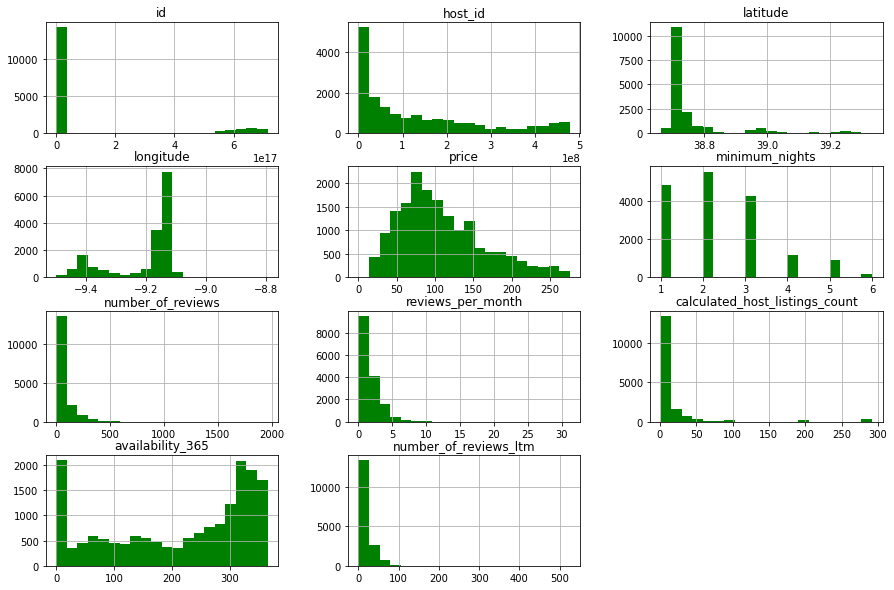

In [15]:
# vamos plotar histogrmas sem outliers
df_clean.hist(bins=20, figsize=(15,10), color='g');

### **Q4. Qual a média dos preços de aluguel?**

Agora vamos falar de algo bem relevante: **preços**. Mais precisamente, vamos ver qual é a media do preço de aluguel de imóveis em Lisboa.

A média da coluna price aponta um valor médio de € 108.11 por aluguel!

In [16]:
# ver a média da coluna `price``
round(df_clean.price.mean() , 2)

108.11

### **Q4. Qual a correlação existente entre as variáveis**

Correlação pode ser entendida como uma métrica para a relação entre coisas. Nessa análise, vamos verificar as relações entre duas variáveis.

Para quantificar essa correlação, podemos usar o coeficiente de correlação, que é um parâmetro com valor absoluto limitado entre 0 (indicando nenhuma correlação) e 1 (indicando máxima correlação).

Para melhorar a visualização sobre esse coeficiente, usarei das seguintes ferramentas:

- Criar uma matriz de correlação
- Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

In [17]:
# criar uma matriz de correlação
correlation = df_clean[['price','minimum_nights','number_of_reviews', 'reviews_per_month', 'availability_365','number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
correlation


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_of_reviews_ltm
price,1.000000,0.022828,-0.063968,-0.032194,0.131814,0.012040
minimum_nights,0.022828,1.000000,-0.006455,-0.184707,-0.129982,-0.116175
number_of_reviews,-0.063968,-0.006455,1.000000,0.530790,-0.000414,0.687195
reviews_per_month,-0.032194,-0.184707,0.530790,1.000000,0.106094,0.675320
availability_365,0.131814,-0.129982,-0.000414,0.106094,1.000000,0.100709
number_of_reviews_ltm,0.012040,-0.116175,0.687195,0.675320,0.100709,1.000000


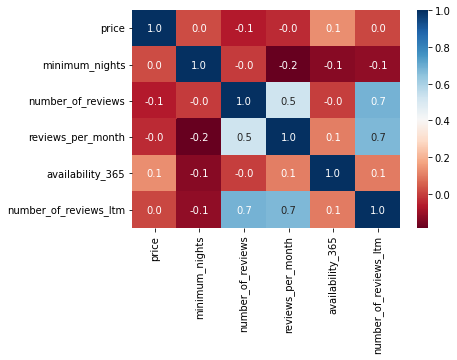

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlation, cmap='RdBu',fmt='.1f', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type()` em nosso dataset representa o tipo de imóvel alugado. 
Quem já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas, e ainda a opção de alugar um quarto de hotel.

Vamos investigar quais os valores e as relevâncias percentuais de cada um desses tipos. Para isso vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`



In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    15096
Private room        4074
Hotel room           252
Shared room          229
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round((df.room_type.value_counts()/df.shape[0] * 100) , 3)

Entire home/apt    76.821
Private room       20.732
Hotel room          1.282
Shared room         1.165
Name: room_type, dtype: float64

Em primeiro lugar, com esmagadores 76.82%, os apartamentos/casas inteiras são o tipo de imóvel mais alugado em Lisboa. 

Em segundo lugar, temos os quartos privados, com 20.73%, em terceiro lugar temos os quartos de hotel com 1.28%, e por fim os quartos compartilhados é o tipo menos oferecidos para aluguel.

### **Q6. Qual a localidade mais cara do dataset?**



Uma forma de agrupar entradas do mesma coluna é utilizando o método `groupby()`. Com isso, podemos aqui comparar os preços médios dos imóveis por bairro.

In [21]:
# ver preços por bairros, na média
round(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).head(10) , 2)

neighbourhood
Aveiras de Baixo                              270.00
Vale do Paraso                                260.00
Vermelha                                      192.25
Aldeia Galega da Merceana e Aldeia Gavinha    175.33
Turcifal                                      162.60
Painho e Figueiros                            161.00
Bucelas                                       159.00
Santa Brbara                                  154.56
Arranh                                        150.00
Ribamar                                       149.20
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

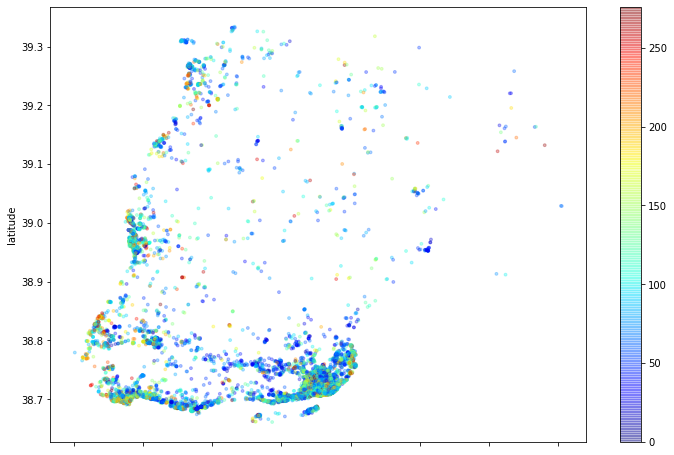

In [22]:
# plotar os imóveis pela latitude e longitude
df_clean.plot.scatter(x = 'longitude', y = 'latitude', alpha = 0.3, s=8,
                      c = df_clean.price, colormap ='jet',figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Podemos também extrair do nosso dataset a média do número mínimo de noites para reserva, através da inspeção da média da coluna `minimum_nights`.

In [23]:
# ver a média da coluna `minimum_nights
round((df_clean.minimum_nights.mean()), 3)

2.31

## Conclusões


A **análise dos dados do Airbnb** foi realiazada para as cidades da região metropolitana de Lisboa.

- O dataset da região metropolitana de Lisboa é bem extenso e possui alguns dados que indicam conter outliers;
- É possível verificar que a maior parte dos imóveis possuem boa taxa de disponibilidade para o próximo ano;
- O dataset possui vários outliers que altera o resultado correto dos dados;
- A região metropolitana de Lisboa é uma região onde a grande maioria de locaçÕes pelo Airbnb é de casa ou apartamentos completos e quartos privados;